In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from io import StringIO
import joblib
from tkinter import *

In [2]:
#Loading the Dataset
data = pd.read_csv('Mall_Customers.csv')

In [3]:
# Overall structure of the Dataset
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Display Top 5 Rows of The Dataset

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Check Last 5 Rows of The Dataset

In [6]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [7]:
data.shape

(200, 5)

In [8]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 200
Number of Columns 5


# Get Information About Our Dataset 

In [9]:
#Displays complete information like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Check Null Values In The Dataset

In [10]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Get Overall Statistics About The Dataset

In [11]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Insights From The Dataset

<Axes: xlabel='Gender', ylabel='count'>

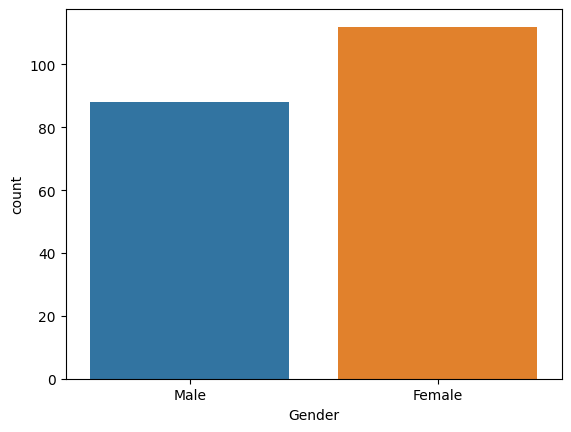

In [12]:
# let's check the count of Males vs Females

sns.countplot(x=data["Gender"],data=data)

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

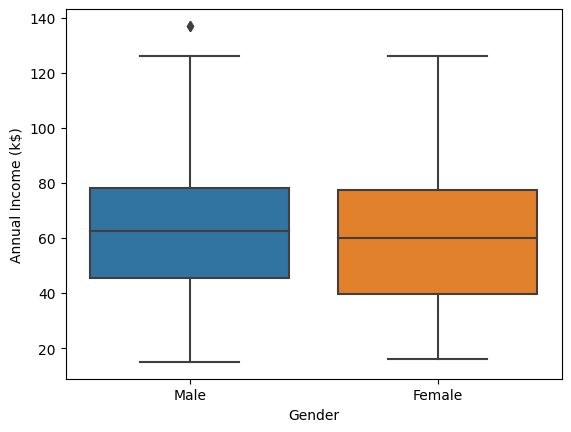

In [13]:
# let's check the average distribution of the annual income in a boxplot

sns.boxplot(x=data["Gender"],y=data["Annual Income (k$)"],data=data)

<Axes: >

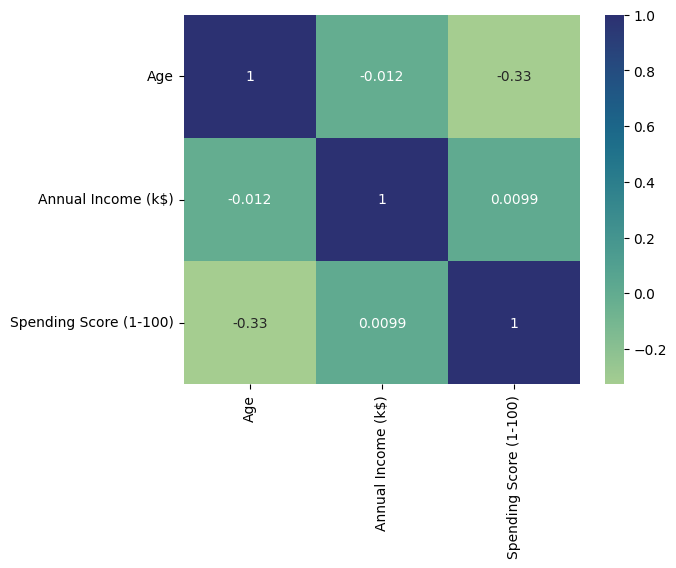

In [4]:
# let's see the coorelation amoung the columns

sns.heatmap(data[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr(),annot=True,cmap="crest")

**Here, it is seen that there is negative coorelation between Age and Spending Score (1-100). So, as Age increases the Spending Score decreases. And the annual income is in positive coorelation with the Spending Score (1-100).**

c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


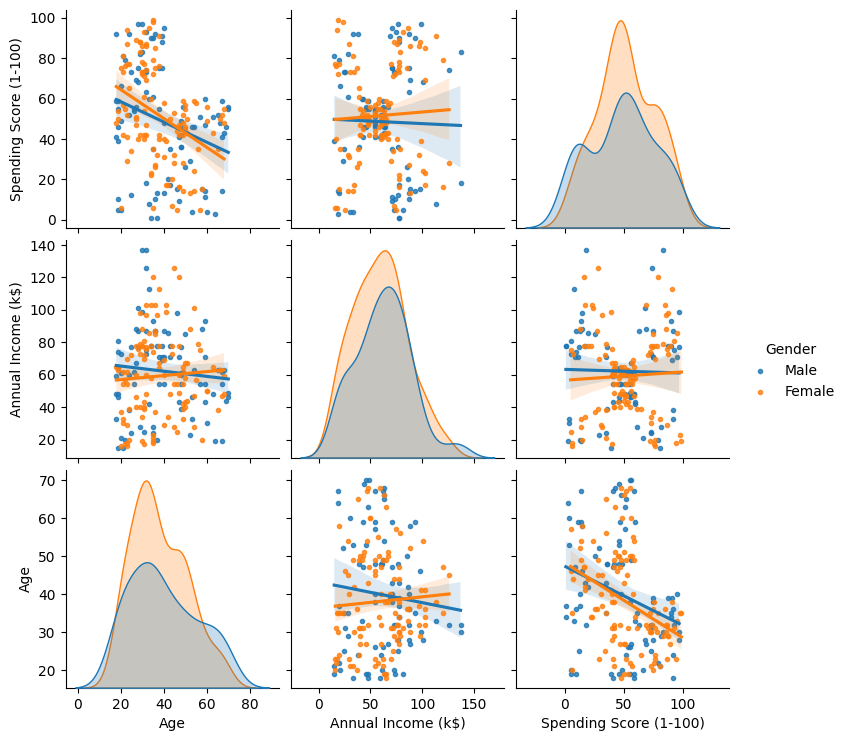

In [ ]:
# let's check the overall relation of all the columns with a pairplot

sns.pairplot(data,hue="Gender",x_vars=["Age","Annual Income (k$)","Spending Score (1-100)"],y_vars=["Spending Score (1-100)","Annual Income (k$)","Age"],kind="reg",markers=[".","."])


**The Insights from the above pairplot are:**

**1) The People of Age between 20 to 40 have more Spending Score.**

**2) The People who have Annual income between 40k$ to 70k$ (Moderate), which is the majority of the People are spending moderately , mainly Females.**

**3) The Annual Income increase as the Age increase for females and decrease as the Age increase for males.**

# Kmeans Clustering

In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means = KMeans()
k_means.fit(X)

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [ ]:
k_means = KMeans(n_clusters=5)
k_means.fit_predict(X)

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

# Elbow Method To Find Optimal Number of Clusters

In [ ]:
wcss=[]
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

In [ ]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37455.98455516028,
 30241.343617936593,
 25043.970949607225,
 22119.99312141347,
 19664.685196005543]

In [ ]:
import matplotlib.pyplot as plt

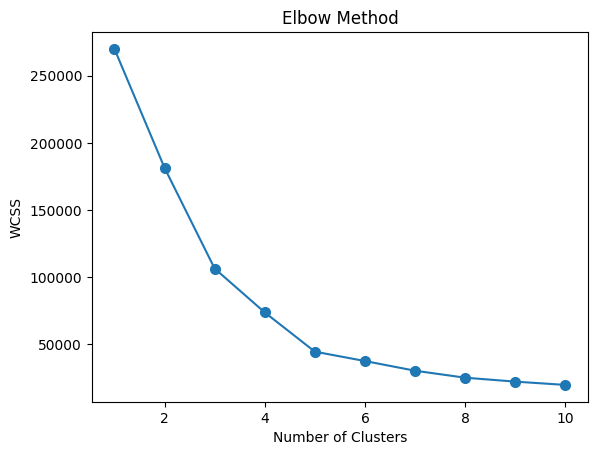

In [ ]:
plt.plot(range(1,11),wcss,"o-",markersize=7)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Model Training

In [ ]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
k_means = KMeans(n_clusters=5,random_state=42)
y_means = k_means.fit_predict(X)

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

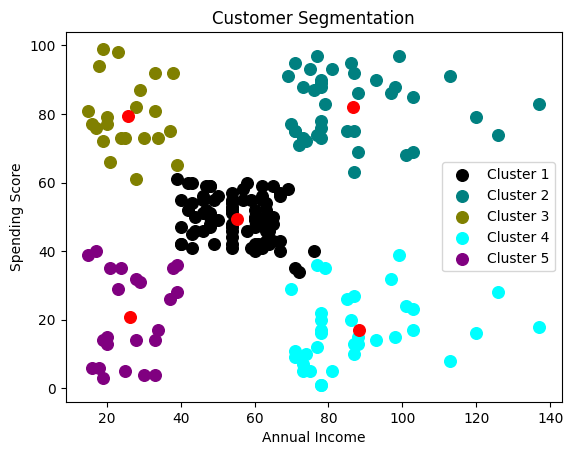

In [ ]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=70,c='black',label="Cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=70,c='teal',label="Cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=70,c='olive',label="Cluster 3")
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=70,c='cyan',label="Cluster 4")
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=70,c='purple',label="Cluster 5")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=70,c="red")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [ ]:
k_means.predict([[15,39]])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

# Save The Model

In [ ]:
import joblib

In [ ]:
joblib.dump(k_means,"customer_segmentation")

['customer_segmentation']

In [ ]:
model = joblib.load("customer_segmentation")

In [ ]:
model.predict([[15,39]])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

# GUI

In [ ]:
from tkinter import *
import joblib

In [5]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    
    model = joblib.load('customer_segmentation')
    result=model.predict([[p1,p2]])
    print("This Customer belongs to cluster no: ", result[0])
    
    if result[0] == 0:
        Label(master, text="Customers with medium annual income and medium annual spend").grid(row=31)
    elif result[0]==1:
        Label(master, text="Customers with high annual income but low annual spend").grid(row=31)
    elif result[0]==2:
        Label(master, text="Customers with low annual income and low annual spend").grid(row=31)
    elif result[0]==3:
        Label(master, text="Customers low annual income but high annual spend").grid(row=31)
    elif result[0]==4:
        Label(master, text="Customers with high annual income and high annual spend").grid(row=31)

master = Tk()
master.title("Customer Segmentation Using Machine Learning")


label = Label(master, text = "Customer Segmentation Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

Label(master,text="Annual Income").grid(row=1)
Label(master, text="Spending Score").grid(row=2)


e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

# Decision Tree

In [ ]:
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


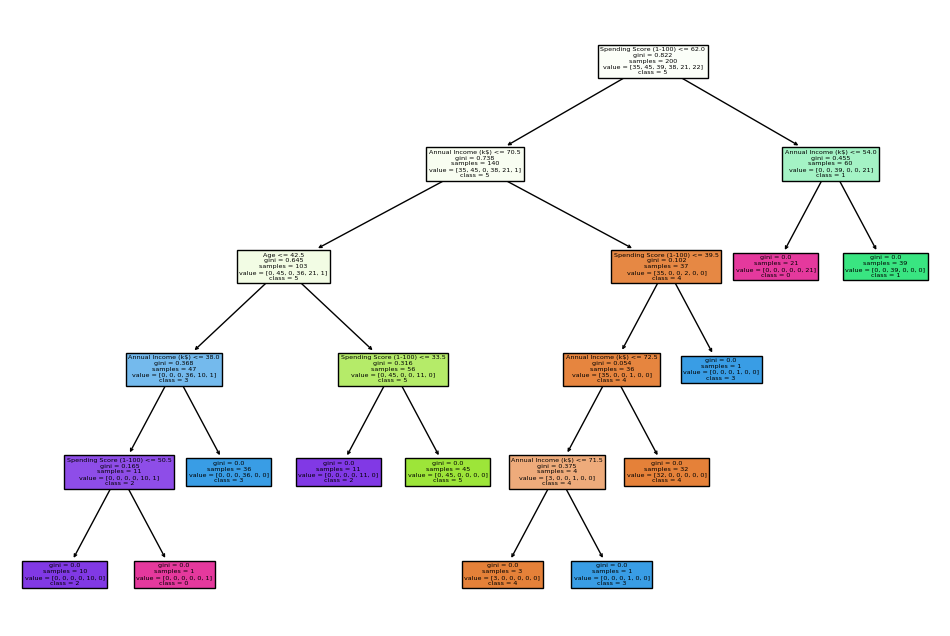

In [3]:
import pydotplus
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from io import StringIO
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


data = pd.read_csv('Mall_Customers.csv')
X1 = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = data['CustomerID']

optimal_clusters = 6
kmeans_model = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, max_iter=300, 
                      tol=0.0001, random_state=111, algorithm='elkan')
kmeans_model.fit(X1)
data['pred_cluster_kmeans'] = kmeans_model.labels_

#display(pd.DataFrame(data['pred_cluster_kmeans'].value_counts(normalize=True)))
#clf = DecisionTreeClassifier()
#clf = clf.fit(X1, data['pred_cluster_kmeans'])
#data['pred_class_dtree'] = clf.predict(X1)

#display(pd.crosstab(data['pred_cluster_kmeans'], data['pred_class_dtree']))

dot_data = StringIO()
export_graphviz(
    decision_tree=clf, 
    out_file=dot_data,  
    filled=True, 
    rounded=False,
    impurity=False,
    special_characters=True, 
    feature_names=X1.columns.tolist(),  # Use your actual feature names
    class_names=data['pred_cluster_kmeans'].unique().astype(str).tolist(),
)

# Create and save the decision tree visualization as an image file
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("./decisiontree.png")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X1.columns.tolist(), class_names=data['pred_cluster_kmeans'].unique().astype(str).tolist(), filled=True)
plt.show()
